In [36]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import pi
import matplotlib

In [37]:
matplotlib.rcParams['font.family'] = ['Segoe UI Symbol']

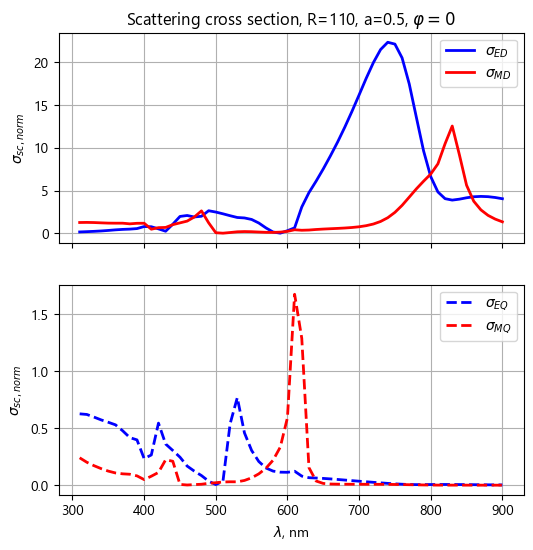

In [64]:

R = 110

sigma = np.loadtxt(f'data-export-13-02-25\\sigma-sc-au-{R}nm-a-05-phase-0.txt', skiprows=9, delimiter=',')
fig, [ax1, ax2] = plt.subplots(2,1, figsize=(6,6), sharex=True)

ax1.plot(sigma[:,0], sigma[:,1]/(pi*R**2*1e-18), label='$\\sigma_{ED}$', lw=2, c='blue')
ax1.plot(sigma[:,0], sigma[:,2]/(pi*R**2*1e-18), label='$\\sigma_{MD}$', lw=2, c='red')
ax2.plot(sigma[:,0], sigma[:,3]/(pi*R**2*1e-18), label='$\\sigma_{EQ}$', lw=2, c='blue', ls='--')
ax2.plot(sigma[:,0], sigma[:,4]/(pi*R**2*1e-18), label='$\\sigma_{MQ}$', lw=2, c='red', ls='--')
ax1.grid()
ax2.grid()
ax2.set_xlabel('$\\lambda$, nm')
ax1.set_ylabel('$\\sigma_{sc, norm}$')
ax2.set_ylabel('$\\sigma_{sc, norm}$')
ax1.set_title(f'Scattering cross section, R={R}, a=0.5, $\\varphi=0$')
ax1.legend()
ax2.legend()
plt.savefig(f'scat_sc_{R}nm.pdf', format="pdf", bbox_inches='tight')
plt.show()

In [65]:
import force
from tqdm import tqdm
import frenel
# import dipoles

eps_Au = frenel.get_interpolate('Au')
eps_Si = frenel.get_interpolate('Si')

wl = 800  # [nm]
STOP = 45
R = 110
dist = 20
point = [0,0,dist+R]
angle = 25*np.pi/180
phase = 0
a = 0.5


# print(dipoles.calc_dipoles_v2(wl, eps_Au, point, R, eps_Si, angle, amplitude=1, phase=phase, a=a, stop=STOP ))

# print(force.F(wl, eps_Au, point, R, eps_Si, angle,amplitude=1,phase=phase,a=a, stop=STOP))

wls = np.linspace(300,900, 50)
F_x = np.empty_like(wls)
F_y = np.empty_like(wls)
F_z = np.empty_like(wls)
for i in tqdm(range(len(wls))):
    F_x[i], F_y[i], F_z[i] = force.F(wls[i], eps_Au, point, R, eps_Si, angle,amplitude=1,phase=phase,a=a, stop=STOP)

  0%|          | 0/50 [00:00<?, ?it/s]c:\Users\borod\Desktop\SPP_ANALYTICAL\SPP_ANALYTICAL\.venv\Lib\site-packages\scipy\integrate\_quadpack_py.py:441: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  re_retval = quad(refunc, a, b, args, full_output, epsabs,
100%|██████████| 50/50 [01:51<00:00,  2.23s/it]


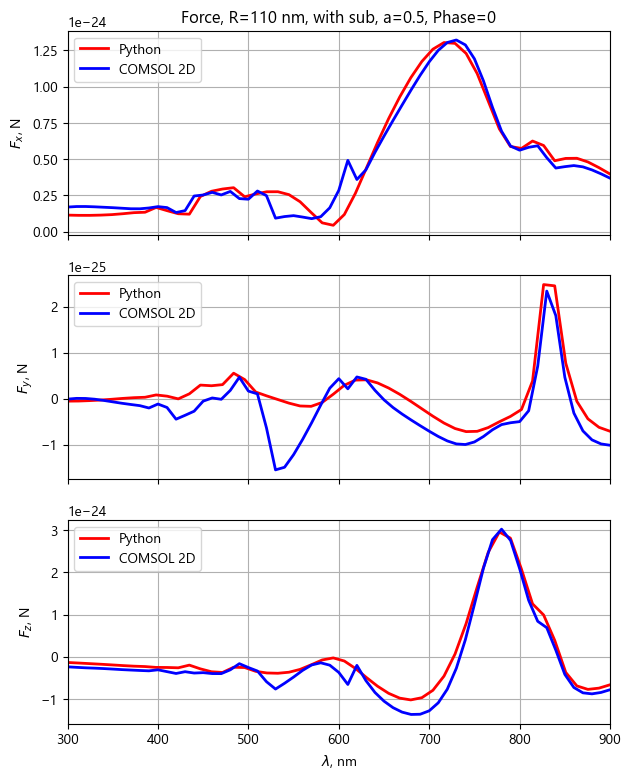

In [66]:
fig, [ax1,ax2, ax3] = plt.subplots(3,1, figsize=(7,9), sharex=True) 

force_comsol = np.loadtxt(f'data-export-13-02-25/force-au-{R}nm-a-05-phase-0.txt', skiprows=8, delimiter=',')
ax1.plot(wls, F_x, label='Python', c='red', lw=2)
ax1.set_ylabel('$F_x$, N')
ax1.plot(force_comsol[:,0],force_comsol[:,1], label='COMSOL 2D', c='blue', lw=2 )
ax1.legend()
ax1.grid()


ax2.plot(wls, F_y, label='Python', c='red', lw=2)
ax2.set_ylabel('$F_y$, N')
ax2.plot(force_comsol[:,0],force_comsol[:,2], label='COMSOL 2D', c='blue', lw=2 )
ax2.legend()
ax2.grid()



ax3.plot(wls, F_z, label='Python', c='red', lw=2)
ax3.set_ylabel('$F_z$, N')
ax3.plot(force_comsol[:,0],force_comsol[:,3], label='COMSOL 2D', c='blue', lw=2 )
ax3.legend()
ax3.grid()

ax1.set_title(f'Force, R={R} nm, with sub, a={a}, Phase={phase}')
ax1.set_xlim(wls[0],wls[-1])
ax3.set_xlabel('$\\lambda$, nm')
plt.savefig(f'force_{R}nm.pdf', format="pdf", bbox_inches='tight')
plt.show()